In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset
spotify_data = pd.read_csv('/Users/davelotito/Documents/Data/top50.csv',encoding = "ISO-8859-1")

# Inspect Data

In [3]:
# Inspect dataset columns 
spotify_data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [4]:
spotify_data.sample(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
18,19,Lalala,Y2K,canadian hip hop,130,39,84,-8,14,50,161,18,8,88
25,26,If I Can't Have You,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,49,6,70
12,13,Someone You Loved,Lewis Capaldi,pop,110,41,50,-6,11,45,182,75,3,88
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
24,25,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,12,68,195,25,30,89
48,49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
27,28,It's You,Ali Gatie,canadian hip hop,96,46,73,-7,19,40,213,37,3,89
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [5]:
spotify_data.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

# Clean Data & Columns

In [6]:
# Drop unwanted columns
spotify_data.drop(columns='Unnamed: 0', inplace=True)

In [7]:
# Clean up column names a bit & replace periods with underscores
spotify_data.columns = spotify_data.columns.str.replace('.', '_', regex=False)
# CLean up column names, removing underscores and standardizing them
spotify_data.drop(columns=['Length_', 'Valence_', 'Loudness__dB__'], inplace=True)
spotify_data.drop(columns=['Speechiness_', 'Acousticness__'], inplace=True)

In [8]:
spotify_data.sample(3)

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Liveness,Popularity
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,11,87
7,How Do You Sleep?,Sam Smith,pop,111,68,48,8,90
31,7 rings,Ariana Grande,dance pop,140,32,78,9,89


In [9]:
# Check for anomalies in data
spotify_data['Track_Name'].unique()

array(['Señorita', 'China', 'boyfriend (with Social House)',
       'Beautiful People (feat. Khalid)', 'Goodbyes (Feat. Young Thug)',
       "I Don't Care (with Justin Bieber)", 'Ransom', 'How Do You Sleep?',
       'Old Town Road - Remix', 'bad guy', 'Callaita',
       'Loco Contigo (feat. J. Balvin & Tyga)', 'Someone You Loved',
       'Otro Trago - Remix', 'Money In The Grave (Drake ft. Rick Ross)',
       'No Guidance (feat. Drake)', 'LA CANCIÓN',
       'Sunflower - Spider-Man: Into the Spider-Verse', 'Lalala',
       'Truth Hurts', 'Piece Of Your Heart', 'Panini',
       'No Me Conoce - Remix', 'Soltera - Remix',
       'bad guy (with Justin Bieber)', "If I Can't Have You",
       'Dance Monkey', "It's You", 'Con Calma', 'QUE PRETENDES',
       'Takeaway', '7 rings', '0.958333333333333',
       'The London (feat. J. Cole & Travis Scott)', 'Never Really Over',
       'Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy)',
       'Otro Trago', 'Antisocial (with Travis Sco

In [10]:
# Isolate the anomolie
anomolie = spotify_data[spotify_data['Track_Name'] =='0.958333333333333']

In [11]:
# Treat the anomalie with another Track Name
anomolie['Track_Name'] = anomolie['Track_Name'].str.replace('0.958333333333333', 'HP')

/var/folders/hp/3dhbxb5j0vzgq_s64y3bq0mw0000gn/T/ipykernel_39239/1734259562.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  anomolie['Track_Name'] = anomolie['Track_Name'].str.replace('0.958333333333333', 'HP')
/var/folders/hp/3dhbxb5j0vzgq_s64y3bq0mw0000gn/T/ipykernel_39239/1734259562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomolie['Track_Name'] = anomolie['Track_Name'].str.replace('0.958333333333333', 'HP')


In [12]:
# Append results back to original dataset
spotify_data = anomolie.append(spotify_data, ignore_index=True)


/var/folders/hp/3dhbxb5j0vzgq_s64y3bq0mw0000gn/T/ipykernel_39239/970197598.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spotify_data = anomolie.append(spotify_data, ignore_index=True)


In [13]:
# Drop duplicate columns with different values
spotify_data.drop(index=1, inplace=True)
spotify_data.drop(index=13, inplace=True)
spotify_data.drop(index=0, inplace=True)

In [14]:
# Check for existenceo of duplicated values
spotify_data[spotify_data.duplicated()]

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Liveness,Popularity


In [15]:
spotify_data.columns

Index(['Track_Name', 'Artist_Name', 'Genre', 'Beats_Per_Minute', 'Energy',
       'Danceability', 'Liveness', 'Popularity'],
      dtype='object')

In [16]:
len(spotify_data)

48

In [17]:
len(spotify_data[spotify_data.isnull()])

48

# EXPLORATORY DATA ANALYSIS

In [18]:
spotify_data.corr()

,Beats_Per_Minute,Energy,Danceability,Liveness,Popularity
Beats_Per_Minute,1.000000,0.032387,-0.109564,-0.171913,0.200561
Energy,0.032387,1.000000,-0.039994,0.148764,-0.110580
Danceability,-0.109564,-0.039994,1.000000,-0.164082,-0.057600
Liveness,-0.171913,0.148764,-0.164082,1.000000,0.072584
Popularity,0.200561,-0.110580,-0.057600,0.072584,1.000000


<AxesSubplot:>

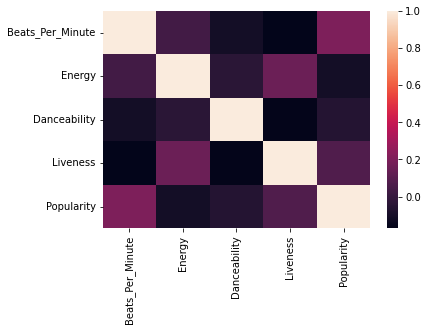

In [19]:
# Create heatmap to see correlations between columns
sns.heatmap(spotify_data.corr())

In [22]:
spotify_data.sort_values('Popularity', ascending=False)

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Liveness,Popularity
10,bad guy,Billie Eilish,electropop,135,43,70,10,95
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,11,94
11,Callaita,Bad Bunny,reggaeton,176,62,61,24,93
2,China,Anuel AA,reggaeton flow,105,81,79,8,92
15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,12,92
7,Ransom,Lil Tecca,trap music,180,64,75,7,92
24,Soltera - Remix,Lunay,latin,92,78,80,44,91
22,Panini,Lil Nas X,country rap,154,59,70,12,91
21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,7,91
20,Truth Hurts,Lizzo,escape room,158,62,72,12,91


In [111]:
spotify_data.sort_values(by='Artist_Name',ascending=True)
# spotify_data.drop(columns=['Loudness_dB'],inplace=True)

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Liveness,Popularity,Speechiness,Length,Valence
19,It's You,Ali Gatie,canadian hip hop,96,46,73,19,89,3,213,40
7,China,Anuel AA,reggaeton flow,105,81,79,8,92,9,302,61
2,7 rings,Ariana Grande,dance pop,140,32,78,9,89,33,179,33
50,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,16,85,46,186,70
6,Callaita,Bad Bunny,reggaeton,176,62,61,24,93,31,251,24
49,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,12,89,30,195,68
48,bad guy,Billie Eilish,electropop,135,43,70,10,95,38,194,56
25,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,16,82,15,261,14
22,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,dance pop,96,71,82,15,86,7,185,38
9,Con Calma,Daddy Yankee,latin,94,86,74,6,91,6,193,66


In [114]:
spotify_data.sort_values(by=['Track_Name','Artist_Name','Genre'],ascending=True,inplace=True)

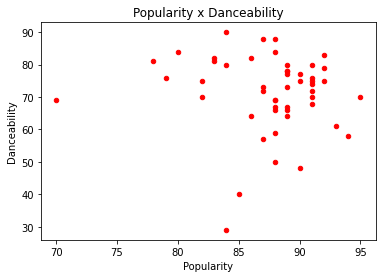

In [194]:
spotify_data.plot(kind='scatter',x='Popularity',y='Danceability',color='red', title='Popularity x Danceability')
plt.show()

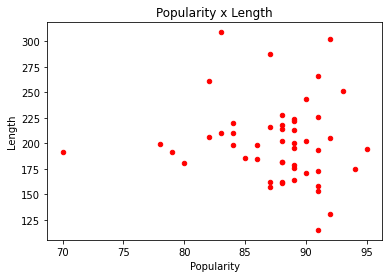

In [195]:
spotify_data.plot(kind='scatter',x='Popularity',y='Length',color='red', title='Popularity x Length')
plt.show()

In [116]:
spotify_data.loc[(spotify_data['Beats_Per_Minute'] >= 75) & (spotify_data['Energy'] == 71 ), ['Beats_Per_Minute', 'Genre', 'Energy']]

,Beats_Per_Minute,Genre,Energy
1,96,reggaeton,71
0,96,reggaeton,71
13,96,reggaeton,71
22,96,dance pop,71
